In [52]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

In [53]:
# Load the temp dataset from txt
# TG_STAID004563
df = pd.read_csv('ECA_blended_custom/TG_STAID004563_copy.txt', header=0)
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [54]:
df.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [55]:
xmap={' SOUID':'souid','    DATE':'date','   TG':'temp', ' Q_TG':'q_tg'}
df2 = df.rename(columns = xmap)

df2.head()

,souid,date,temp,q_tg
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [56]:
df2['temp_new'] = df2['temp'].div(10)
df2['date_time']=pd.to_datetime(df2.date, format='%Y%m%d', errors='ignore')
df2 =df2.drop(['souid', 'date', 'temp', 'q_tg'], axis=1)

df2.head()

# discover missing data values in temp
#df4=df3.loc[df3['q_tg'] == 9]
#df4.sort_values(by=['datetime'], ascending=False)

,temp_new,date_time
0,2.2,1876-01-01
1,2.5,1876-01-02
2,0.3,1876-01-03
3,-5.8,1876-01-04
4,-9.8,1876-01-05


In [57]:
df3 =df2
df3["year"] = df3['date_time'].dt.year
df3["month"] = df3['date_time'].dt.month
df3["day"] = df3['date_time'].dt.day
df3.set_index('date_time', inplace=True)
df3 = df3.loc['1946-01-01':]

df3.head()

,temp_new,year,month,day
date_time,,,,
1946-01-01,-3.4,1946,1,1
1946-01-02,-3.0,1946,1,2
1946-01-03,-2.8,1946,1,3
1946-01-04,-2.7,1946,1,4
1946-01-05,1.4,1946,1,5


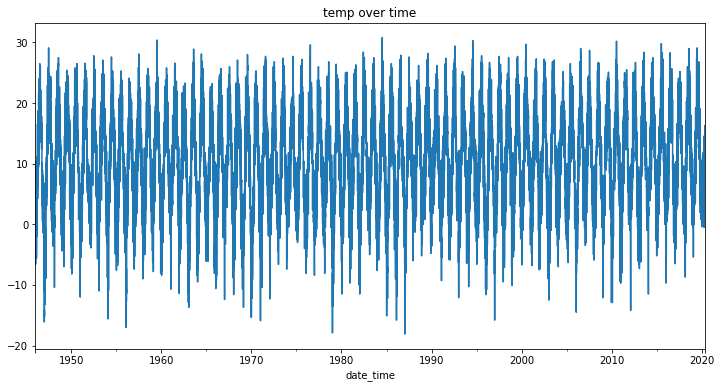

In [58]:
df3.temp_new.plot(figsize=(12,6), title='temp over time')
plt.show()

[Text(0, 0.5, 'temperature'),
 Text(0.5, 0, 'month'),
 Text(0.5, 1.0, 'average temp throughout the months over years'),
 None]

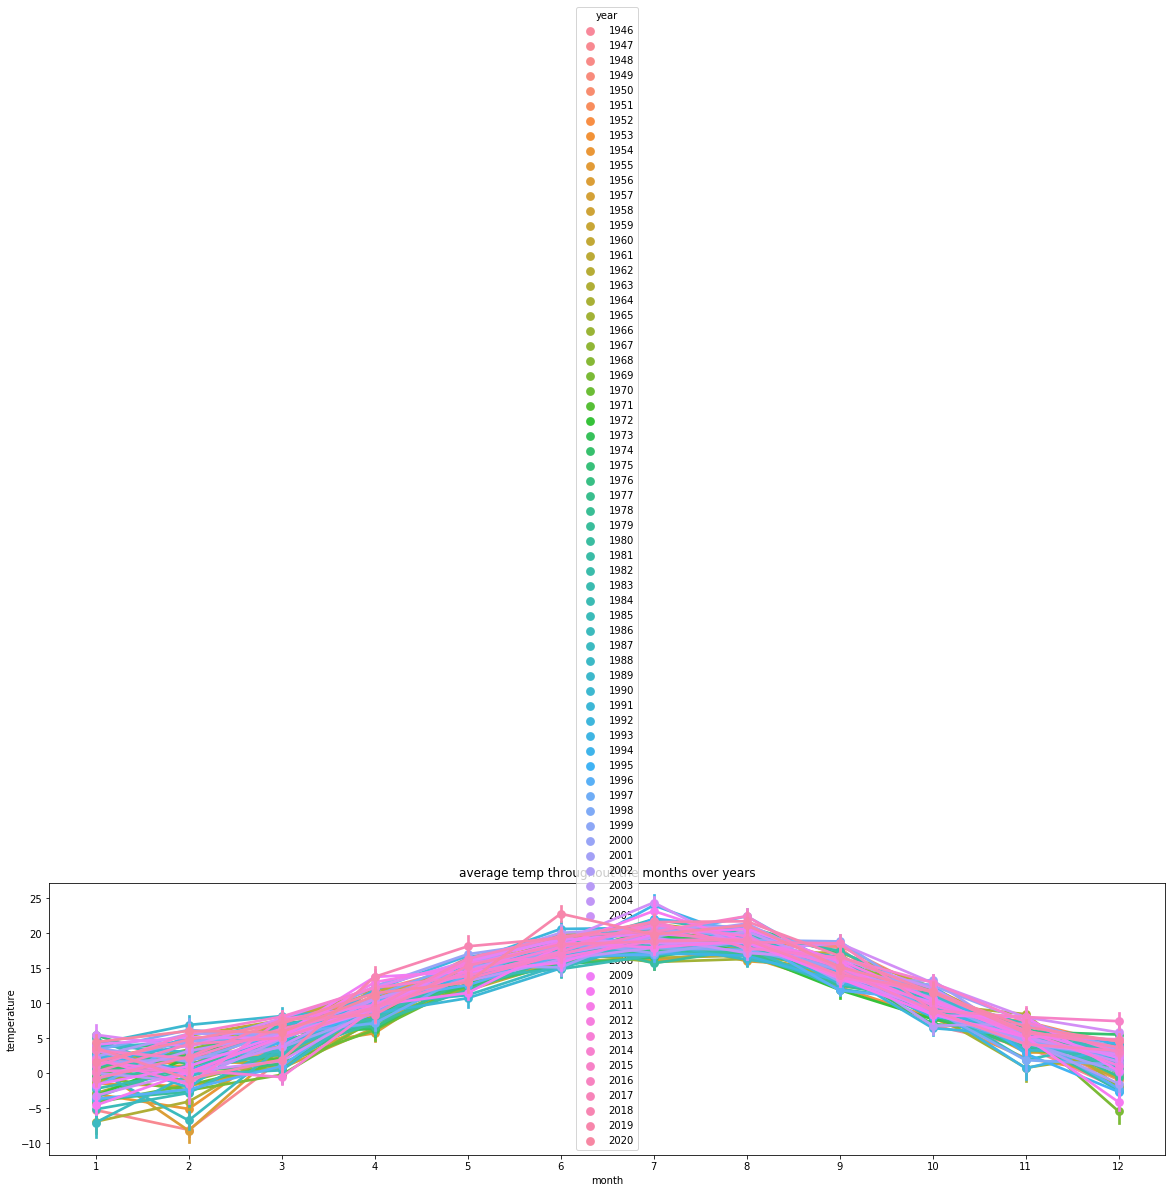

In [36]:
plt.figure(figsize=(20,5))
sns.pointplot(x=df3['month'], 
              y=df3['temp_new'],
              hue=df3['year'], 
              data=df3, join=True).set(xlabel='month', 
                                        ylabel='temperature',
                                                  title="average temp throughout the months over years",
                                                  label='big')

In [60]:
# remove the trend by differencing
df3['1st_temp_diff'] = df3['temp_new'].diff()
df3['2nd_temp_diff'] = df3['1st_temp_diff'].diff()
df3.head()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff
date_time,,,,,,
1946-01-01,-3.4,1946,1,1,NaN,NaN
1946-01-02,-3.0,1946,1,2,0.4,NaN
1946-01-03,-2.8,1946,1,3,0.2,-0.2
1946-01-04,-2.7,1946,1,4,0.1,-0.1
1946-01-05,1.4,1946,1,5,4.1,4.0


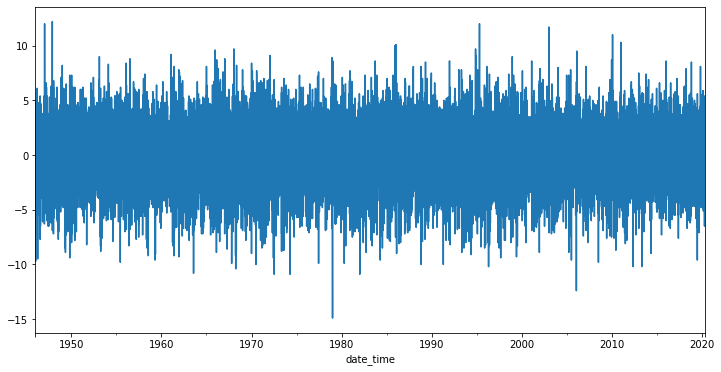

In [61]:
df3['1st_temp_diff'].plot()

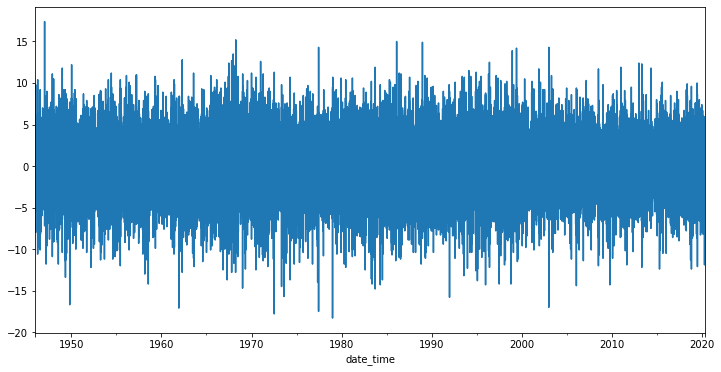

In [62]:
df3['2nd_temp_diff'].plot()

In [64]:
# deseasonalise the data on the basis of column month for first and second instance difference
df3['1st_monthly_mean'] = df3.groupby('month')['1st_temp_diff'].transform('mean')
df3['2nd_monthly_mean'] = df3.groupby('month')['2nd_temp_diff'].transform('mean')
df3.head()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff,1st_monthly_mean,2nd_monthly_mean
date_time,,,,,,,,
1946-01-01,-3.4,1946,1,1,NaN,NaN,-0.00142,-0.009083
1946-01-02,-3.0,1946,1,2,0.4,NaN,-0.00142,-0.009083
1946-01-03,-2.8,1946,1,3,0.2,-0.2,-0.00142,-0.009083
1946-01-04,-2.7,1946,1,4,0.1,-0.1,-0.00142,-0.009083
1946-01-05,1.4,1946,1,5,4.1,4.0,-0.00142,-0.009083


In [67]:
df3.groupby('month')['1st_monthly_mean'].get_group(7)

date_time
1946-07-01    0.059808
1946-07-02    0.059808
1946-07-03    0.059808
1946-07-04    0.059808
1946-07-05    0.059808
                ...   
2019-07-27    0.059808
2019-07-28    0.059808
2019-07-29    0.059808
2019-07-30    0.059808
2019-07-31    0.059808
Name: 1st_monthly_mean, Length: 2294, dtype: float64

In [69]:
# demean the series
df3['1st_deseasonalized'] = df3['1st_temp_diff'] - df3['1st_monthly_mean']
df3['2nd_deseasonalized'] = df3['2nd_temp_diff'] - df3['2nd_monthly_mean']
df3.head()

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temp_new,year,month,day,1st_temp_diff,2nd_temp_diff,1st_monthly_mean,2nd_monthly_mean,1st_deseasonalized,2nd_deseasonalized
date_time,,,,,,,,,,
1946-01-01,-3.4,1946,1,1,NaN,NaN,-0.00142,-0.009083,NaN,NaN
1946-01-02,-3.0,1946,1,2,0.4,NaN,-0.00142,-0.009083,0.40142,NaN
1946-01-03,-2.8,1946,1,3,0.2,-0.2,-0.00142,-0.009083,0.20142,-0.190917
1946-01-04,-2.7,1946,1,4,0.1,-0.1,-0.00142,-0.009083,0.10142,-0.090917
1946-01-05,1.4,1946,1,5,4.1,4.0,-0.00142,-0.009083,4.10142,4.009083


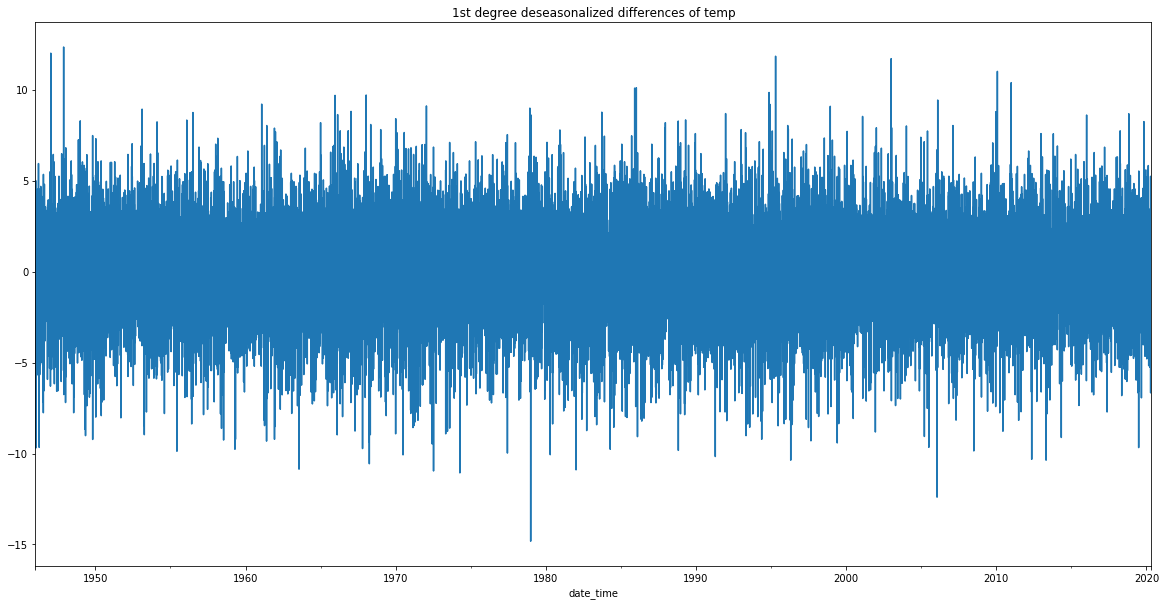

In [74]:
df3['1st_deseasonalized'].plot(figsize=(20,10), title='1st degree deseasonalized differences of temp')

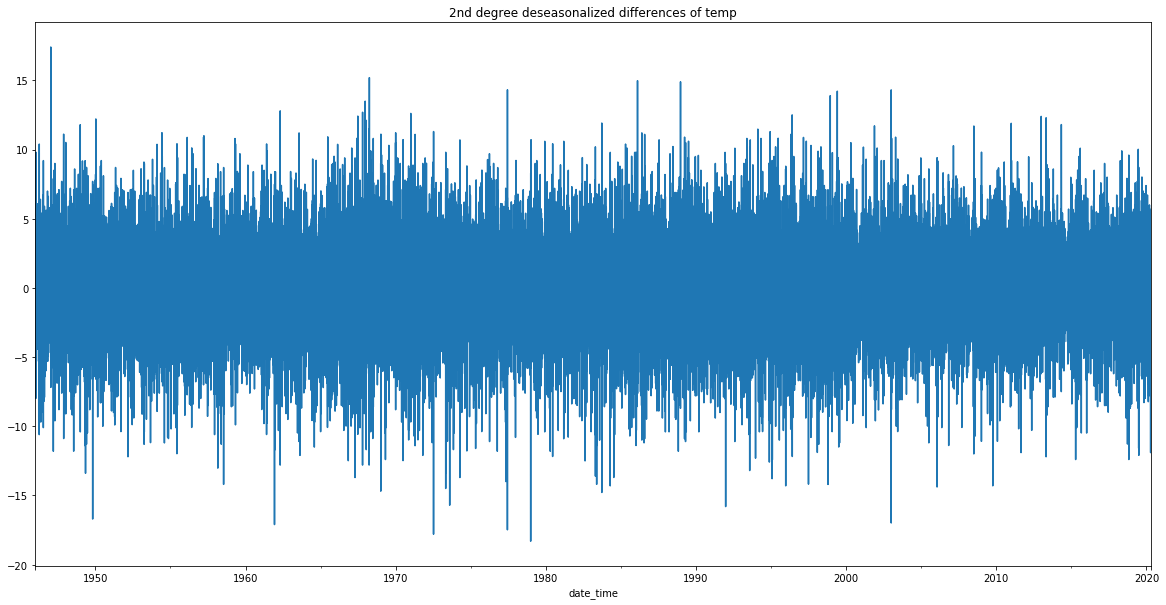

In [75]:
df3['2nd_deseasonalized'].plot(figsize=(20,10), title='2nd degree deseasonalized differences of temp')